* # Perceptron neural network

    * A perceptron is the simplest form of a neural network, specifically a single-layer neural network. 
    * It was introduced by Frank Rosenblatt in 1957. 
    * The perceptron is a binary classifier that takes multiple binary inputs and produces a single binary output.  
    * It's a fundamental building block for more complex neural networks.

In [36]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

# Load the Iris dataset
iris = load_iris()
# Extract petal length and petal width features from the dataset
X = iris.data[:, (2, 3)]  # petal length, petal width
# Create binary classification labels: 1 if Iris setosa, 0 otherwise
y = (iris.target == 0).astype(int)

# Create a Perceptron classifier with specified parameters
## max_iter is the maximum number of training iterations.
## tol is the tolerance, stopping training when the improvement is small.
## random_state ensures reproducibility by setting a random seed.
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
# Train the Perceptron on the dataset
per_clf.fit(X, y)
# Make a prediction for a new input [2, 0.5]
y_pred = per_clf.predict([[2, 0.5]])

* # Building an image classifire using the Sequential API in Keras 

TensorFlow version is  2.10.0
Keras version is  2.10.0
The training set contains 60000 grayscale images, each 28*28 pixels
The first image in the training set is a Coat
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 300)               235500    
                                                                 
 dense_19 (Dense)            (None, 100)               30100     
                                                                 
 dense_20 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


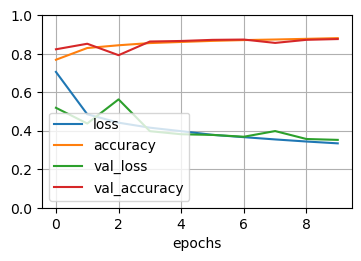

1/1 [==============================] - 0s 69ms/step
The predicted classes are  [9 2 1]
The true classes are  [9 2 1]


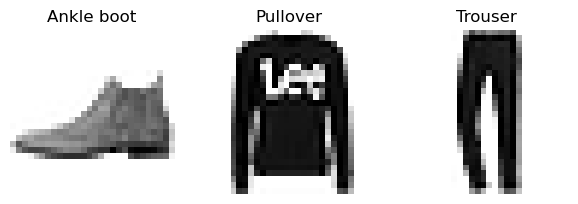

In [37]:
# First, let's import TensorFlow and Keras.
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Print TensorFlow and Keras versions.
print('TensorFlow version is ', tf.__version__)
print('Keras version is ', keras.__version__)

# Loading the fashion MNIST dataset.
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Get the shape of the training set.
(m, n1, n2) = X_train_full.shape
print(f"The training set contains {m} grayscale images, each {n1}*{n2} pixels")

# Split the training set into validation and training sets, and normalize pixel values.
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Normalize pixel values in the test set.
X_test = X_test / 255.

# # plot an image using Matplotlib's `imshow()` function, with a 'binary' color map
# plt.imshow(X_train[0], cmap="binary")
# plt.axis('off')
# plt.show()

# Defining the corresponding class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
# Printing the class name of the first image in the training set
print(f"The first image in the training set is a {class_names[y_train[0]]}")

# Creating a Sequential model
model = keras.models.Sequential()
# Adding a Flatten layer to reshape the input images into a 1D array
model.add(keras.layers.Flatten(input_shape=[28, 28]))
# Adding a Dense layer with 300 neurons and ReLU activation function
model.add(keras.layers.Dense(300, activation="relu"))
# Adding another Dense layer with 100 neurons and ReLU activation function
model.add(keras.layers.Dense(100, activation="relu"))
# Adding the output layer with 10 neurons (for each class) and softmax activation function
model.add(keras.layers.Dense(10, activation="softmax"))

# # Instead of adding the layers one by one as we just did, you can pass a list
# # of layers when creating the Sequential model
# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation="relu"),
#     keras.layers.Dense(100, activation="relu"),
#     keras.layers.Dense(10, activation="softmax")
# ])

# Displaying a summary of the model architecture, including parameters and output shapes
model.summary()

# Plotting the model architecture and saving it as an image
# keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

# Accessing information about the layers in the model
model.layers
hidden1 = model.layers[1]# Retrieving information about the first hidden layer
hidden1.name# Retrieving the name of the first hidden layer

# Retrieving the weights and biases from the first hidden layer
weights, biases = hidden1.get_weights()
weights.shape# Displaying the shape of the weights
biases.shape# Displaying the shape of the biases

# Compiling the model with sparse categorical crossentropy loss,
# stochastic gradient descent (sgd) optimizer, and accuracy metric
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# Training the model on the training data (X_train, y_train) for 30 epochs,
# with validation data provided (X_valid, y_valid)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

# Print the parameters used for model training
print(history.params)

# Print the available information in the training history
print(history.history.keys())

# Create a DataFrame with the training history and plot learning curves
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(4, 2.5))
plt.grid(True)
plt.xlabel('epochs')
plt.gca().set_ylim(0, 1)
plt.show()

# Evaluate the trained model on the test data to assess its performance
model.evaluate(X_test, y_test)

# Select the first 3 instances from the test set for prediction
X_new = X_test[:3]

# Predict probabilities for each class for the selected instances
y_proba = model.predict(X_new)
y_proba.round(2)

# Predict the class with the highest probability for each instance
y_pred = np.argmax(y_proba, axis=1)
print("The predicted classes are ",y_pred)

# Extract the true labels for the selected instances
y_new = y_test[:3]
print("The true classes are ",y_new)

# Plot the selected instances along with their true labels
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
# Adjust spacing between subplots for better visualization
plt.subplots_adjust(wspace=0.2, hspace=0.5)
# Show the plot
plt.show()

* # Building a regression MLP (Multi-Layer Perceptron) using the Sequential API in Keras 

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.8349 - val_loss: 0.8754
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7672 - val_loss: 0.7110
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6994 - val_loss: 0.6849
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6612 - val_loss: 0.6153
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6291 - val_loss: 0.5832
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6009 - val_loss: 0.5586
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5770 - val_loss: 0.5443
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5562 - val_loss: 0.5162
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5371 - val_loss: 0.4973
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5206 - val_loss: 0.4831

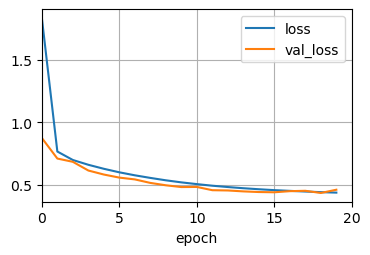

In [38]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

# Load California housing dataset
housing = fetch_california_housing()

# Split the dataset into training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

# Initialize the StandardScaler and standardization the training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Scale the validation and test data using the same scaler
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
# Now, X_train, X_valid, and X_test are scaled and ready for training and testing a model

# Set seed for reproducibility
# Setting a random seed, such as tf.random.set_seed(42), in machine learning ensures consistent 
# generation of random numbers for processes like weight initialization or data shuffling. 
np.random.seed(42)
tf.random.set_seed(42)

# Create a Sequential model
model = keras.models.Sequential([
    # The input layer is implicitly defined when you specify the input_shape parameter in the first layer
    # keras.layers.InputLayer(input_shape=X_train.shape[1:]), 
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),# First layer with 30 neurons, ReLU activation
    keras.layers.Dense(1)# Second layer with 1 neuron (output layer for regression) 
])

# Compile the model
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
# Use mean squared error as the loss function and stochastic gradient descent as the optimizer

# Train the model on the training data with validation on the validation data
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

# Evaluate the model on the test data and calculate mean squared error
mse_test = model.evaluate(X_test, y_test)

# Take the first 3 samples from the test set and predict their outputs
X_new = X_test[:3]
y_pred = model.predict(X_new)

# Plot the training and validation loss over epochs
pd.DataFrame(history.history).plot(figsize=(4, 2.5))
plt.grid(True)
plt.gca().set_xlim(0, 20)
plt.xlabel('epoch')
plt.show()

* # Wide & Deep neural network (Using the Functional API)
    Not all neural network models follow a simple sequential structure. The architecture of neural networks can indeed be quite diverse, and models with complex topologies, multiple inputs, and/or multiple outputs are not uncommon. One such example is the __Wide & Deep neural network__.
    
    The Wide & Deep model, introduced by Google in a research paper titled "Wide & Deep Learning for Recommender Systems," combines the strengths of both a wide linear model and a deep neural network. This architecture aims to provide the best of both worlds by capturing complex patterns as well as memorizing feature interactions.
    
    __In the Wide & Deep model:__
    
    * __Wide Component (Linear Model):__ This part of the model focuses on memorizing feature interactions through a linear model. It's particularly useful for capturing relationships between different features. (The term "feature interactions" refers to how different aspects, or features, relate to each other. In the context of movie recommendations, features could be things like movie genres, actors, or even the user's past behavior (like movies they've watched before).)
    
    * __Deep Component (Neural Network):__ The deep part of the model is responsible for capturing intricate patterns and representations in the data. It helps in generalizing well to unseen examples.
    
    By combining these two components, the Wide & Deep model is capable of handling both memorization and generalization tasks, making it particularly effective for recommendation systems.

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load California housing dataset
housing = fetch_california_housing()

# Split the dataset into training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

# Initialize the StandardScaler and standardization the training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Scale the validation and test data using the same scaler
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Using the Functional API, we create layers, When hidden layer
# is created, it's called like a function, taking the input as 
# an argument. This approach allows us to easily connect layers in 
# a flexible way, forming a more complex neural network architecture.

# Define the input layer with the shape of the training data
input_ = keras.layers.Input(shape=X_train.shape[1:])
# Create the first hidden layer
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
# Create the second hidden layer
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
# Create the concatenate layer, that concatenate the input layer with the output of the second hidden layer
concat = keras.layers.concatenate([input_, hidden2])
# Create the output layer
output = keras.layers.Dense(1)(concat)
# Build the model using the Functional API
model = keras.models.Model(inputs=[input_], outputs=[output])

# Display a summary of the model architecture, including layer information and parameters
model.summary()

# Compile the model, specifying the loss function and optimizer
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# Train the model on the training data for 20 epochs, validating on the validation set
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

# Evaluate the model on the test set and calculate the mean squared error
mse_test = model.evaluate(X_test, y_test)

# Make predictions on new data (X_new)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

## Multiple inputs
  * Sending different subsets of input features through the wide or deep paths
  * We will send __5__ features (features 0 to 4), and __6__ through the __deep path__ (features 2 to 7). 
  Note that __3__ features will go through __both__ (features 2, 3 and 4).

In [4]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define two input layers, one for the wide path and one for the deep path
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

# Create the first hidden layer
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
# Create the second hidden layer
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
# Concatenate the output of the wide input layer and the second hidden layer of the deep path
concat = keras.layers.concatenate([input_A, hidden2])
# Create the output layer with 1 neuron and give it a name
output = keras.layers.Dense(1, name="output")(concat)
# Build the model using two input layers and one output layer
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

# Compile the model, specifying mean squared error as the loss function
# and using Stochastic Gradient Descent (SGD) as the optimizer with a specific learning rate
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# Prepare data for training and testing by splitting the inputs into wide and deep paths
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

# Train the model using both wide and deep inputs, monitoring performance on the validation set
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

# Evaluate the model on the test set, calculating the mean squared erro
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

# Make predictions on new data (X_new) using both wide and deep inputs
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 2.7994 - val_loss: 1.2146
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7683 - val_loss: 0.6631
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6254 - val_loss: 0.5829
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5737 - val_loss: 0.5394
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5416 - val_loss: 0.5100
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5178 - val_loss: 0.4886
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4991 - val_loss: 0.4710
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4844 - val_loss: 0.4553
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4720 - val_loss: 0.4434
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4621 - val_loss: 0.4327

## Adding extra outputs
 * In specific tasks, multiple outputs are necessary. For example, in locating and classifying the main object in an image, both regression (finding object coordinates, width, and height) and classification are essential components.
 * In scenarios with multiple independent tasks from the same data, training a single neural network with one output per task often yields superior results. For instance, in multitask classification for facial images, one output can classify facial expressions (e.g., smiling, surprised), while another can identify whether the person is wearing glasses.
 * To enhance the model's generalization, auxiliary outputs can be added in a neural network architecture. This inclusion ensures that the underlying portion of the network learns valuable features independently, without solely depending on the rest of the network.

In [5]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define two input layers, one for the wide path and one for the deep path
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

# Create the first hidden layer for the deep path with 30 neurons and ReLU activation
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)

# Create the second hidden layer for the deep path with 30 neurons and ReLU activation
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

# Concatenate the output of the wide input layer and the second hidden layer of the deep path
concat = keras.layers.concatenate([input_A, hidden2])

# Create the main output layer with 1 neuron and give it a name
output = keras.layers.Dense(1, name="main_output")(concat)

# Create an auxiliary output layer with 1 neuron from the second hidden layer
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

# Build the model with two inputs and two outputs (main and auxiliary)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

# Compile the model with mean squared error as the loss function for both outputs
# Use SGD as the optimizer with a specific learning rate
# Specify the loss weights to emphasize the main output during training
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# Train the model using both wide and deep inputs, with main and auxiliary outputs
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

# Evaluate the model on the test set, obtaining total, main, and auxiliary losses
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

# Make predictions on new data (X_new) for both main and auxiliary outputs
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 2.7271 - main_output_loss: 2.6137 - aux_output_loss: 3.7477 - val_loss: 1.2575 - val_main_output_loss: 1.0536 - val_aux_output_loss: 3.0919
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0334 - main_output_loss: 0.8909 - aux_output_loss: 2.3157 - val_loss: 1.0414 - val_main_output_loss: 0.8288 - val_aux_output_loss: 2.9547
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8729 - main_output_loss: 0.7653 - aux_output_loss: 1.8417 - val_loss: 1.0464 - val_main_output_loss: 0.8540 - val_aux_output_loss: 2.7780
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8008 - main_output_loss: 0.7104 - aux_output_loss: 1.6140 - val_loss: 0.8832 - val_main_output_loss: 0.6799 - val_aux_output_loss: 2.7122
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7500 - main_output_loss: 0.6688 - aux_output_loss: 1.4811 - val_loss

* # Wide & Deep neural network (Using the subclassing API)
    The Subclassing API in TensorFlow offers flexibility by allowing you to define custom models that include loops, varying shapes, conditional branching, and other dynamic behaviors that are not as straightforward to implement with the Sequential or Functional APIs. By subclassing the Model class, you gain complete control over the forward pass of your model, enabling you to implement complex architectures.

In [6]:
# Define the custom model class inheriting from keras.models.Model
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # Call the constructor of the parent class (Model)
        # Define the layers in the constructor
        self.hidden1 = keras.layers.Dense(units, activation=activation)  # First hidden layer
        self.hidden2 = keras.layers.Dense(units, activation=activation)  # Second hidden layer
        self.main_output = keras.layers.Dense(1)  # Output layer for the main output
        self.aux_output = keras.layers.Dense(1)  # Auxiliary output layer
        
        # the call method is the entry point for the forward pass during both training and inference. 
        # It encapsulates the computations that transform input data into meaningful predictions and outputs.
    def call(self, inputs):
        # Split the inputs; it's assumed that the model receives a tuple of two inputs
        input_A, input_B = inputs
        # Pass input_B through the hidden layers
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        # Concatenate input_A and the output of hidden2
        concat = keras.layers.concatenate([input_A, hidden2])
        # Compute the main output
        main_output = self.main_output(concat)
        # Compute the auxiliary output
        aux_output = self.aux_output(hidden2)
        # Return both outputs
        return main_output, aux_output

# Instantiate the model with 30 units and ReLU activation for each layer
model = WideAndDeepModel(30, activation="relu")

# Compile the model specifying the loss function for each output and the optimizer
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# Fit the model to the data
# Note: X_train_A, X_train_B, y_train, X_valid_A, X_valid_B, y_valid should be defined beforehand
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))

# Evaluate the model on the test set
# Note: X_test_A, X_test_B, y_test should be defined beforehand
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))

# Make predictions with the model
# Note: X_new_A, X_new_B should be defined beforehand
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 2.7643 - output_1_loss: 2.3564 - output_2_loss: 6.4348 - val_loss: 4.1150 - val_output_1_loss: 3.9373 - val_output_2_loss: 5.7143
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 1.1697 - output_1_loss: 0.7826 - output_2_loss: 4.6543 - val_loss: 1.8216 - val_output_1_loss: 1.5896 - val_output_2_loss: 3.9091
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.9290 - output_1_loss: 0.6572 - output_2_loss: 3.3747 - val_loss: 1.1587 - val_output_1_loss: 0.8902 - val_output_2_loss: 3.5752
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8160 - output_1_loss: 0.6153 - output_2_loss: 2.6227 - val_loss: 0.9738 - val_output_1_loss: 0.6875 - val_output_2_loss: 3.5507
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7468 - output_1_loss: 0.5877 - output_2_loss: 2.1788 - val_loss: 0.8768 - val_output_1_loss: 0.5857 - val_ou